In [0]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [0]:
genes = ['gene' + str(i) for i in range(1,101)]
genes

Out[3]: ['gene1',
 'gene2',
 'gene3',
 'gene4',
 'gene5',
 'gene6',
 'gene7',
 'gene8',
 'gene9',
 'gene10',
 'gene11',
 'gene12',
 'gene13',
 'gene14',
 'gene15',
 'gene16',
 'gene17',
 'gene18',
 'gene19',
 'gene20',
 'gene21',
 'gene22',
 'gene23',
 'gene24',
 'gene25',
 'gene26',
 'gene27',
 'gene28',
 'gene29',
 'gene30',
 'gene31',
 'gene32',
 'gene33',
 'gene34',
 'gene35',
 'gene36',
 'gene37',
 'gene38',
 'gene39',
 'gene40',
 'gene41',
 'gene42',
 'gene43',
 'gene44',
 'gene45',
 'gene46',
 'gene47',
 'gene48',
 'gene49',
 'gene50',
 'gene51',
 'gene52',
 'gene53',
 'gene54',
 'gene55',
 'gene56',
 'gene57',
 'gene58',
 'gene59',
 'gene60',
 'gene61',
 'gene62',
 'gene63',
 'gene64',
 'gene65',
 'gene66',
 'gene67',
 'gene68',
 'gene69',
 'gene70',
 'gene71',
 'gene72',
 'gene73',
 'gene74',
 'gene75',
 'gene76',
 'gene77',
 'gene78',
 'gene79',
 'gene80',
 'gene81',
 'gene82',
 'gene83',
 'gene84',
 'gene85',
 'gene86',
 'gene87',
 'gene88',
 'gene89',
 'gene90',
 'gene91',


In [0]:
wt=['wt'+str(i) for i in range(1,6)]
ko=['ko'+str(i) for i in range(1,6)]
data=pd.DataFrame(columns=[*wt,*ko], index=genes)

In [0]:
data
for gene in data.index:
    data.loc[gene,'wt1':'wt5']=np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5']=np.random.poisson(lam=rd.randrange(10,1000), size=5)
    
print(data.head())
print(data.shape)

       wt1  wt2  wt3  wt4  wt5  ko1   ko2   ko3   ko4   ko5
gene1  403  396  364  387  345  277   306   311   300   308
gene2  925  945  942  902  959  945  1000  1059  1028  1012
gene3  838  840  860  856  863  170   167   143   148   174
gene4  236  262  241  272  236  881   919   872   890   915
gene5  212  169  205  196  186  194   217   219   173   190
(100, 10)


In [0]:
scaled_data = preprocessing.scale(data.T)
pca=PCA()
pca.fit(scaled_data)
pca_data=pca.transform(scaled_data)

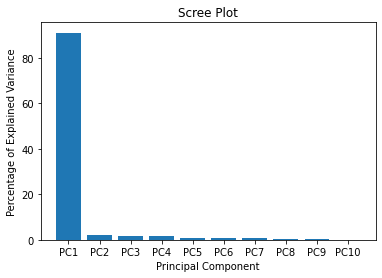

In [0]:
per_var=np.round(pca.explained_variance_ratio_ *100, decimals=1)
labels=['PC'+str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

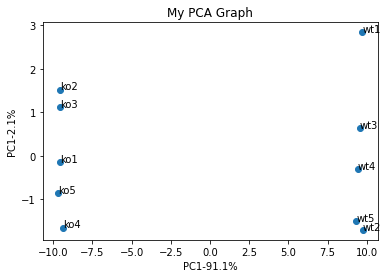

In [0]:
pca_df=pd.DataFrame(pca_data, index=[*wt,*ko], columns=labels)
pca_df
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1-{0}%'.format(per_var[0]))
plt.ylabel('PC2-{0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
    
plt.show()


In [0]:
loading_scores=pd.Series(pca.components_[0],index=genes)
sorted_loading_scores=loading_scores.abs().sort_values(ascending=False)

top_10_genes=sorted_loading_scores[0:10].index.values
print(loading_scores[top_10_genes])

gene43    0.104744
gene94   -0.104735
gene29   -0.104733
gene6    -0.104716
gene44    0.104701
gene54    0.104698
gene23   -0.104682
gene64    0.104677
gene13    0.104677
gene18   -0.104674
dtype: float64


In [0]:
top_10_genes

Out[32]: array(['gene43', 'gene94', 'gene29', 'gene6', 'gene44', 'gene54',
       'gene23', 'gene64', 'gene13', 'gene18'], dtype=object)